In [105]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt
import pyBigWig as bw


# load data

In [149]:
def get_signal_gt_th(signal, th, max_gap=10):
    idx = np.where(signal > th)[0]
    intervals = []
    interval = None
    for i in idx:
        # if interval is empty initialize
        if interval is None:
            interval = [i,i]
        else:
            # if current value is next to last value, add to interval
            if i <= interval[1] + max_gap:
                interval[1] = i
            else:
                # if not, add interval to list and start new interval
                intervals.append(interval)
                interval = [i,i]
    # add last interval
    if interval is not None:
        intervals.append(interval)
    
    intervals = np.array(intervals)
            
    return intervals

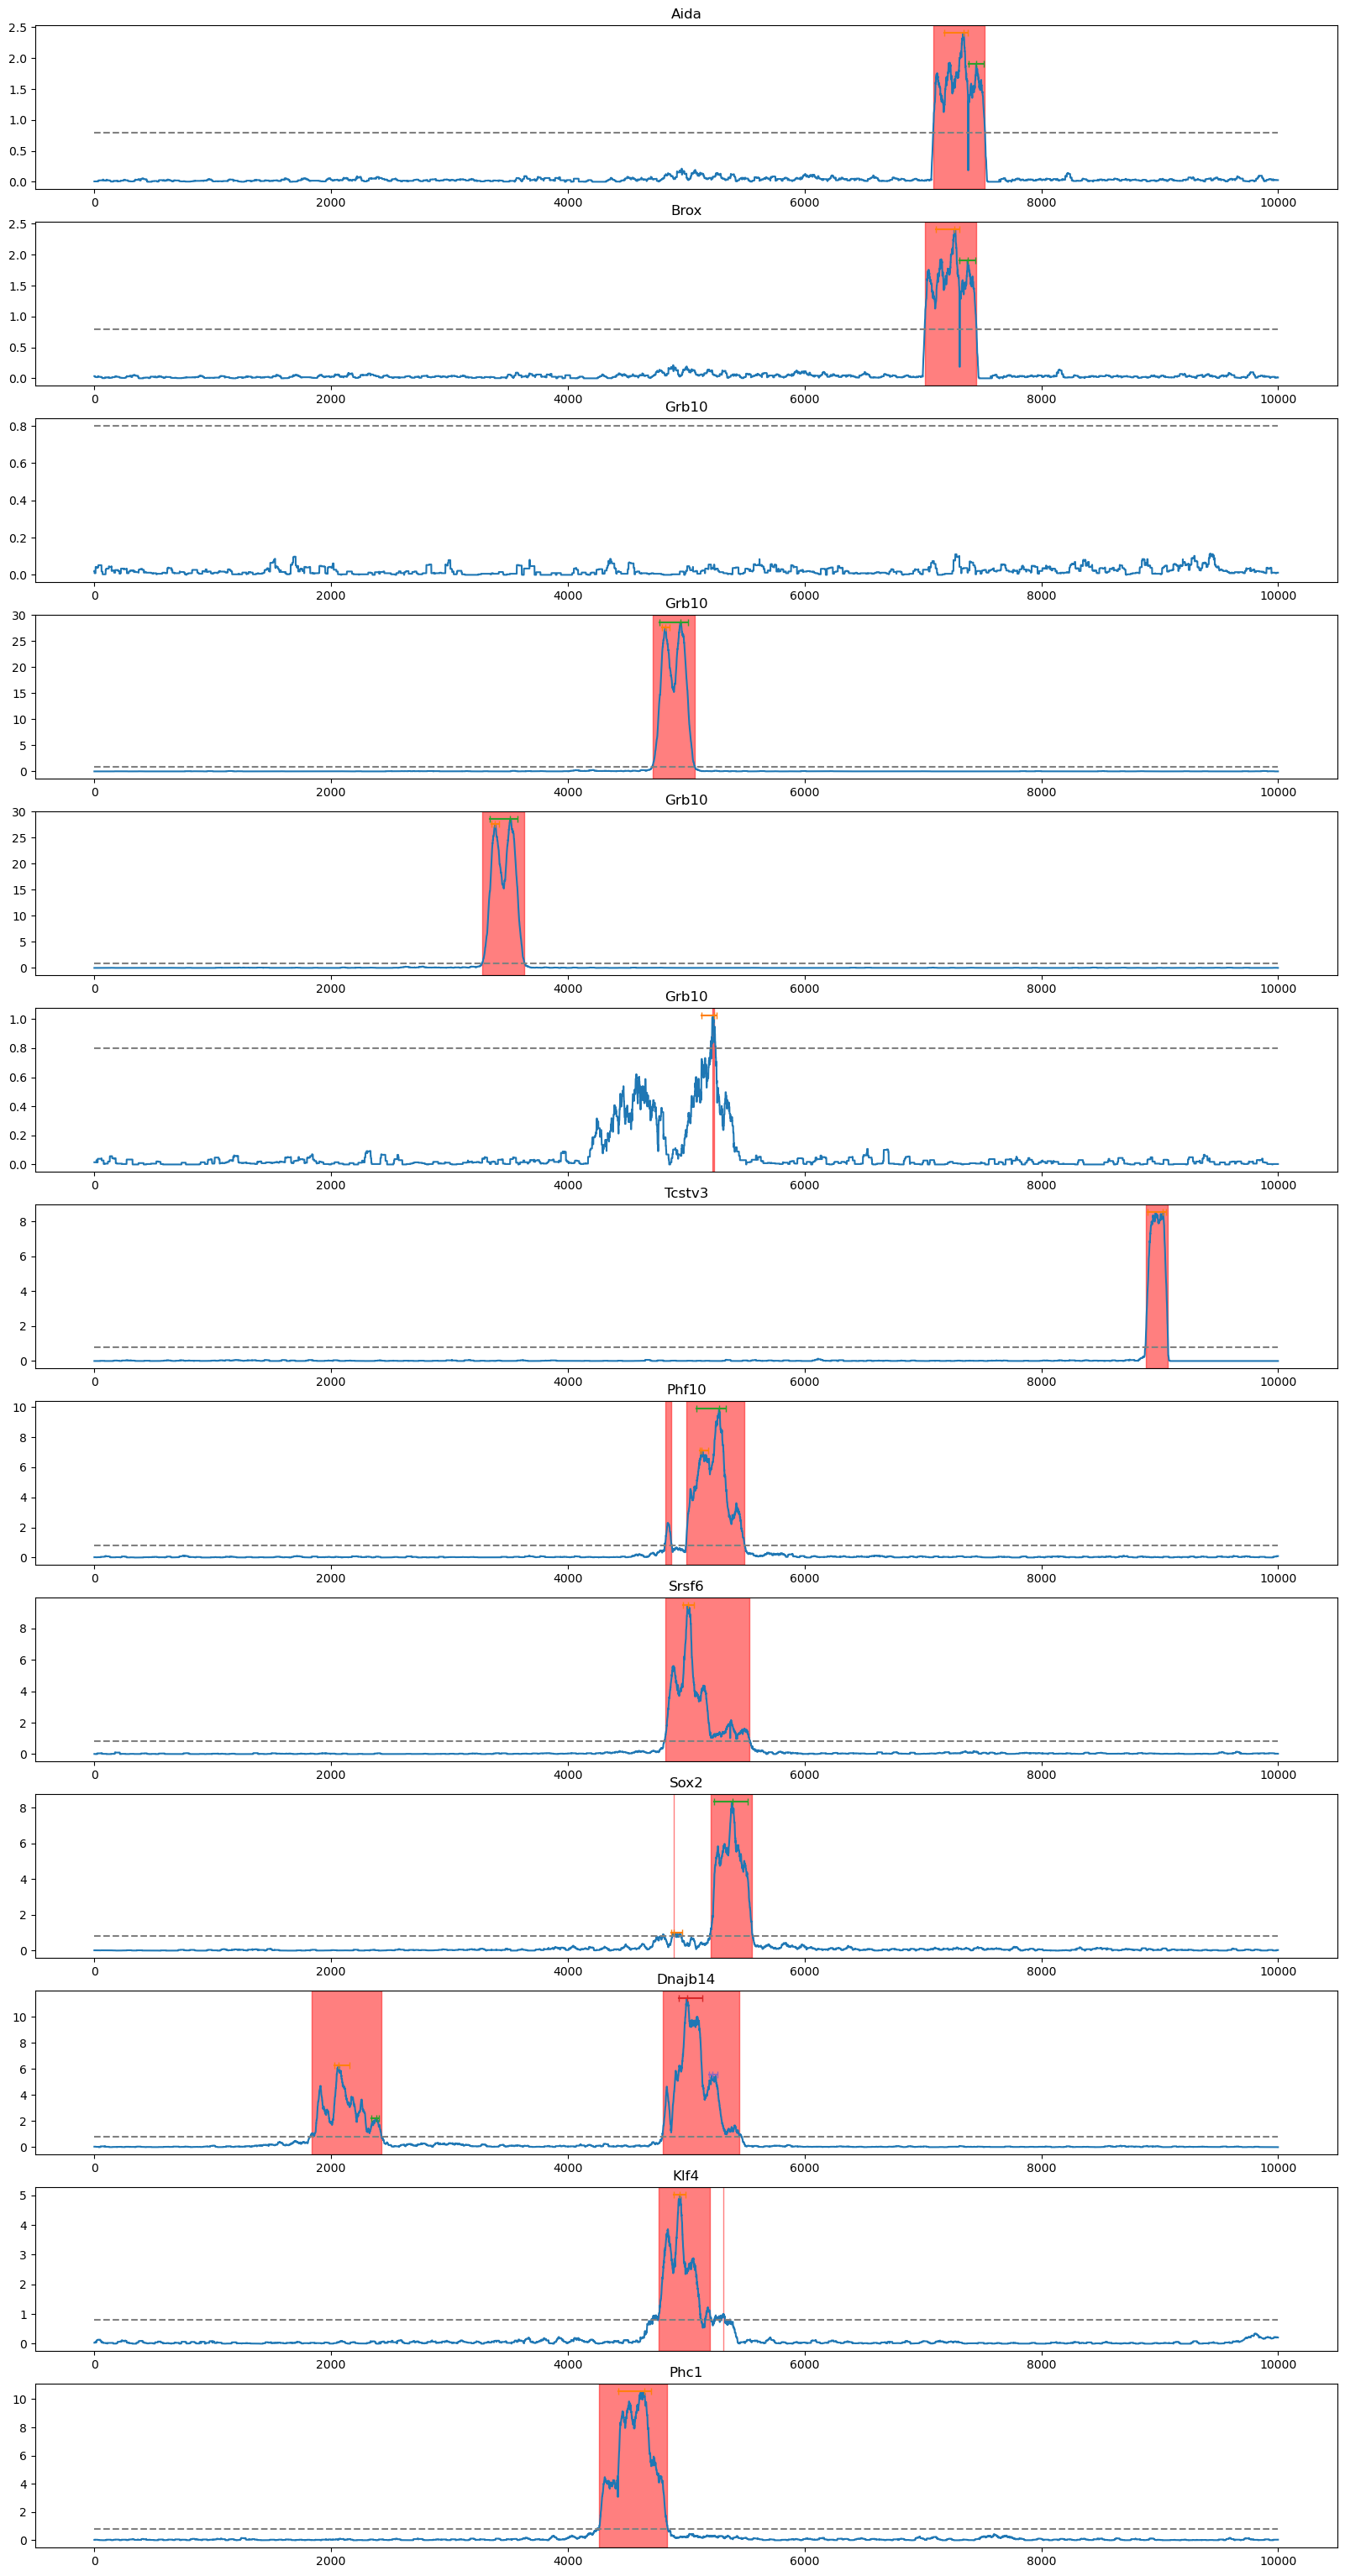

In [151]:
genome = 'mm10'

infile = f'~/Promoterome/results/{genome}/promoterome_pm5kb_filtered_clustered.bed'
promoterome = pd.read_csv(infile, sep='\t')
my_genes = np.array(['Tcstv3','Erdr1','Grb10','Phc1','Cldn34d','Phf10','H2az1','Dnajb14','Srsf6','Brox','Aida','Sox2','Klf4'])

tf = 'E2f1'
infile = f'../results/{genome}/TF_mean_chip/{tf}.bw'


idx_prom, idx_g = np.where(promoterome.gene.values[:,None] == my_genes[None,:])


fig, axes = plt.subplots(len(idx_prom),1,figsize=(20,3*len(idx_prom)))
with bw.open(infile) as fin:
    for f,p in enumerate(idx_prom):
        chrom = promoterome.at[p,'chr']
        start = promoterome.at[p,'start']
        end = promoterome.at[p,'end']
        signal = np.array(fin.values(chrom, start, end))
        signal[np.isnan(signal)] = 0
        peaks, properties = find_peaks(signal,height=1,width=50,distance=25)

        #peak_cwt = find_peaks_cwt(signal, np.arange(1,len(signal)))
        intervals = get_signal_gt_th(signal, 1, 100)

        ax = axes[f]

        ax.plot(signal)
        for i in range(len(peaks)):
            peak = peaks[i]
            l = properties['left_ips'][i]
            r = properties['right_ips'][i]
            y = signal[peak]
            ax.plot([l,peak,r],3*[y], "-|")
            #ax.plot(l,y, '>')
            #ax.plot(r,y, '<')

        if len(intervals) > 0:
            for interval in intervals:
                ax.axvspan(interval[0], interval[1], color='red', alpha=0.5)
        ax.plot([0,len(signal)],[.8,.8],'--',color='gray')
                
        ax.set_title(f'{promoterome.at[p,"gene"]}') 

In [130]:
intervals

[None]

In [96]:
fin = bw.open(infile)
signal = fin.values(chrom, start, end)
peaks, properties = find_peaks(signal, prominence=0.5)

In [103]:
properties

{'peak_heights': array([10.55635548]),
 'prominences': array([10.55635548]),
 'left_bases': array([3834]),
 'right_bases': array([5745]),
 'widths': array([276.03065206]),
 'width_heights': array([5.27817774]),
 'left_ips': array([4427.8175085]),
 'right_ips': array([4703.84816055])}

In [ ]:
)